In [2]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

import matplotlib.pyplot as plt

from scipy.stats import randint
from numpy import argmax
from scipy import stats

In [3]:
from sklearn.metrics import cohen_kappa_score

In [4]:
import sklearn
sklearn.__version__

'1.1.1'

In [5]:
from collections import Counter
from sklearn.metrics import cohen_kappa_score

#Cmax significance with each other (with DILI compounds)

In [7]:
test_data_ncv= pd.read_csv("./test_data_ncv_DILIst_1020.csv")
test_data_heldouttest= pd.read_csv("./test_data_heldouttest_DILIst_255.csv")

In [8]:
file = open("./features_morgan_mordred_maccs_physc.txt", "r")
file_lines = file.read()
all_features = file_lines.split("\n")
all_features = all_features[:-1]
len(all_features)

554

In [9]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[all_features]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [10]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[all_features]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [11]:
from collections import Counter
#from imblearn.over_sampling import SMOTE
import pickle

#Adding predictions for Cmax to the predicted proxy data
for column in ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]:
    
    regressor = pickle.load(open(f"./bestlivmodel_{column}_model.sav", 'rb'))
    
    #Add predictions to held out test set dili
    y_pred = regressor.predict(X_heldouttest)
    test_data_heldouttest[column]=y_pred
    
    #Add predictions to NCV compounds  dili
    y_pred = regressor.predict(X_ncv)
    test_data_ncv[column]=y_pred
    
test_data_heldouttest   

,smiles_r,TOXICITY,Source_rank,Source,Data,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,median pMolar unbound plasma concentration,median pMolar total plasma concentration
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0,13,DILIrank dataset CP Overlap REpsilber,DILI,0,1,0,0,0,...,46.225974,211.120843,6.597526,394.0,18.0,70.0,76.0,3.361111,5.697392,5.909862
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0,1,DILIst Classification Topical,DILI,0,1,0,0,0,...,71.229945,396.002153,10.153901,1406.0,32.0,122.0,139.0,5.305556,7.127063,5.735708
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0,13,DILIrank dataset CP Overlap REpsilber,DILI,0,0,0,0,0,...,73.338433,312.208930,6.121744,1053.0,49.0,134.0,171.0,5.006944,7.273558,6.669353
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,1,1,DILIst Classification Oral,DILI,0,1,0,0,0,...,80.792385,435.227040,7.134870,3122.0,49.0,160.0,186.0,7.277778,7.630859,5.879993
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,1,1,DILIst Classification Oral,DILI,0,0,0,0,0,...,77.185478,358.178024,6.888039,1425.0,59.0,154.0,198.0,5.437500,6.922305,6.280712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0,1,DILIst Classification Intravenous,DILI,0,1,0,0,0,...,42.354113,169.073893,7.351039,198.0,16.0,56.0,63.0,2.805556,5.228802,5.491727
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,1,1,DILIst Classification Intravenous,DILI,0,0,0,0,0,...,80.485250,454.030014,10.558838,2468.0,41.0,156.0,186.0,6.277778,5.102645,3.978435
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0,1,DILIst Classification Oral,DILI,0,1,0,0,0,...,51.876911,259.168462,6.479212,726.0,27.0,92.0,105.0,4.472222,6.572743,6.104609
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,1,1,DILIst Classification Oral,DILI,0,0,0,0,0,...,69.208114,272.177630,6.185855,724.0,39.0,118.0,148.0,4.152778,7.130263,6.535538


In [12]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [13]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [14]:
X_ncv.shape

(1020, 2)

In [15]:
X_heldouttest.shape

(255, 2)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from scipy.stats import randint
from numpy import argmax
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor

In [17]:


#built on PK ncv data, test on DILI

df_subset =test_data_ncv
    
y_train = np.array(df_subset['TOXICITY'])
features= df_subset[["median pMolar unbound plasma concentration", "median pMolar total plasma concentration"]]

feature_list = list(features.columns)
X_train = np.array(features)
    
print(len(X_train[0]))
print(len(y_train))
print(len(X_heldouttest[0]))
print(len(y_heldouttest))
    
print('y_train dataset shape %s' % Counter(y_train))
print('y_heldouttest dataset shape %s' % Counter(y_heldouttest))
          
    
#Hyperparameter Optimisation
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
# Instantiate the RandomHalving search model
param_dist_grid = { 
            'max_depth': randint(5, 20),
            'max_features': randint(30, 50),
            'min_samples_leaf': randint(5, 15),
            'min_samples_split': randint(5, 15),
            'n_estimators':[200, 300, 400, 500, 600],
            'bootstrap': [True, False],
            'oob_score': [False],
            'random_state': [42],
            'criterion': ['gini', 'entropy'],
            'n_jobs': [30],
            'class_weight' : [None, 'balanced_subsample', 'balanced']}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)    
rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=42, n_jobs=30, verbose=1, cv = inner_cv)
rsh.fit(X_train, y_train)
classifier = rsh.best_estimator_
classifier.fit(X_train, y_train)
    

2
1020
2
255
y_train dataset shape Counter({1: 656, 0: 364})
y_heldouttest dataset shape Counter({1: 164, 0: 91})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 1020
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 51
n_resources: 20
Fitting 5 folds for each of 51 candidates, totalling 255 fits
----------
iter: 1
n_candidates: 26
n_resources: 40
Fitting 5 folds for each of 26 candidates, totalling 130 fits
----------
iter: 2
n_candidates: 13
n_resources: 80
Fitting 5 folds for each of 13 candidates, totalling 65 fits
----------
iter: 3
n_candidates: 7
n_resources: 160
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 4
n_resources: 320
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomForestClassifier(criterion='entropy', max_depth=14, max_features=41,
                       min_samples_leaf=13, min_samples_split=5,
                       n_estimators=400, n_jobs=30, random_state=42)

Best Threshold=0.712466
[[69 22]
 [96 68]]
              precision    recall  f1-score   support

           0       0.42      0.76      0.54        91
           1       0.76      0.41      0.54       164

    accuracy                           0.54       255
   macro avg       0.59      0.59      0.54       255
weighted avg       0.64      0.54      0.54       255

balanced_accuracy_score  0.5864379522916108
matthews_corrcoef  0.17330610388777928
Sensitivity 0.7582417582417582
Specificity 0.4146341463414634
f1 0.5354330708661418
LR+ 1.2953296703296702
ppv 0.7555555555555555
average_precision_score 0.7693905412674237
roc_auc_score 0.6824577861163227


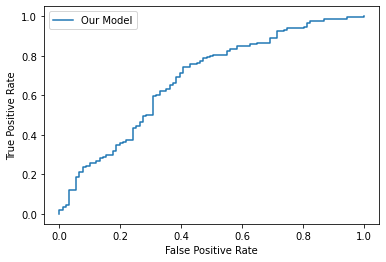

In [18]:
#Add predictions to held out test set dili
y_proba = classifier.predict_proba(X_heldouttest)[:,1]
  
#Add predictions to NCV compounds  dili
y_proba = classifier.predict_proba(X_ncv)[:,1]
    
#Find best threshold using NCV DIlI compounds
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
    
#Comapre for held out test set
y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh  else 0 for x in y_proba ]

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')
    
print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)
       
print("average_precision_score", metrics.average_precision_score(y_heldouttest, y_proba))
    
print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba)) 
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()  

